In [1]:
#Module required
from scipy.interpolate import interp1d
from scipy.stats import t
import os
import glob
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as patches
from scipy import signal
from matplotlib.patches import Rectangle
from scipy.interpolate import UnivariateSpline
np.set_printoptions(threshold=np.inf)  # disable summarization
from scipy.interpolate import PchipInterpolator
from scipy.optimize import minimize
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d, splrep, splev


SL1M2
SL1S2
2L
3R
SR1M2


C:\Users\Kihun\AppData\Local\Temp\ipykernel_38736\280564715.py:9: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,2

1R
SR1F2
1L


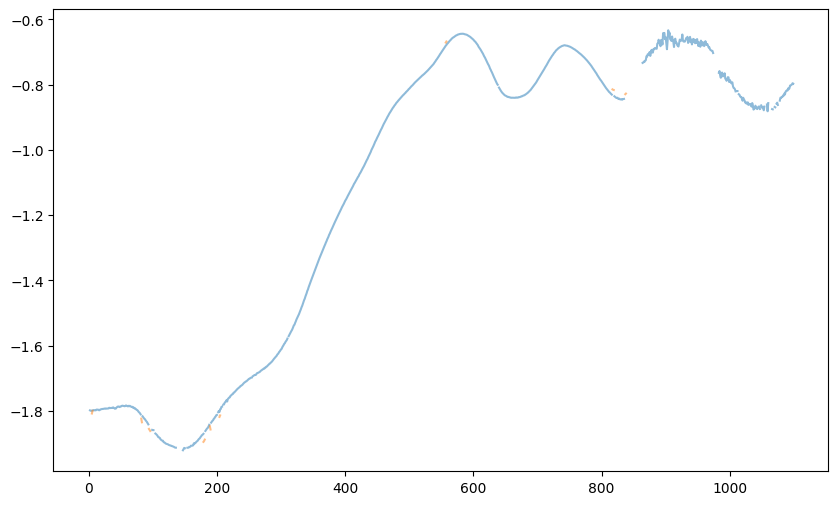

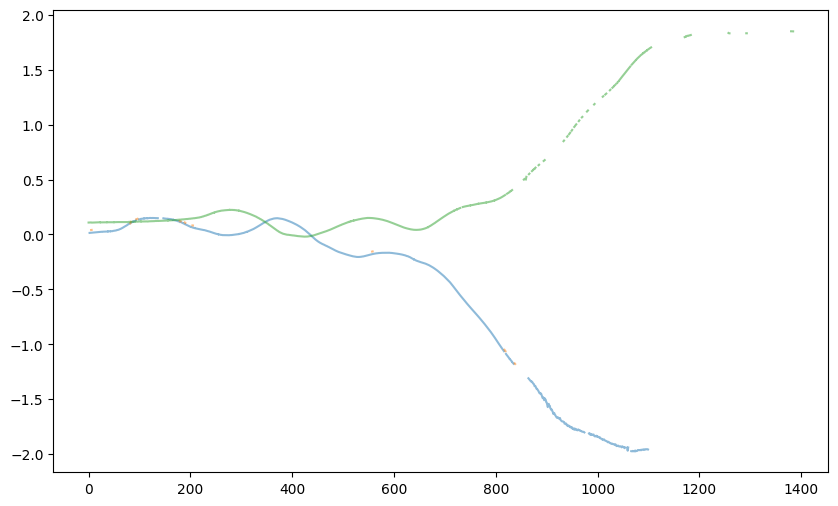

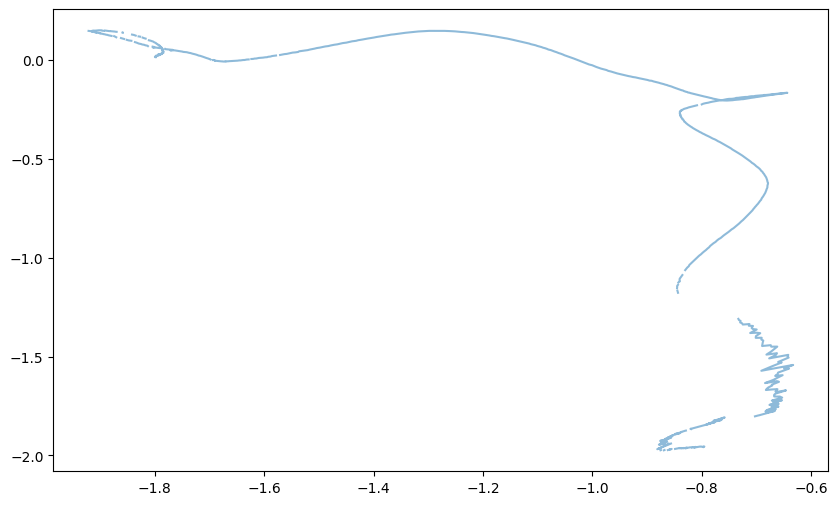

In [13]:
file_path = r"D:\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\2nd_Braille Display\Final Participant Data\AB Participants\05072024_ABParticipant 17\ABParticipant17_NB\Trajectory"
csv_files = glob.glob(os.path.join(file_path, "*.csv"))

label_to_df = {}

for file in csv_files:
    label = os.path.basename(file).split("_")[-1].replace(".csv", "")
    print(label)
    df = pd.read_csv(file, skiprows=3, header=0)
    df = df.apply(pd.to_numeric, errors='coerce').reset_index(drop=True)
    df['label'] = label

    extracted_df = df.iloc[3:, 1:]
    p1_rigidbody016_cols = [col for col in extracted_df.columns if 'RigidBody 016' in col or 'RigidBody016' in col]
    p2_rigidbody017_cols = [col for col in extracted_df.columns if 'RigidBody 017' in col or 'RigidBody017' in col]
    p3_rigidbody014_cols = [col for col in extracted_df.columns if 'RigidBody 014' in col or 'RigidBody014' in col]
    
    p1_df_rigidbody016 = extracted_df[p1_rigidbody016_cols].copy().reset_index(drop=True)
    p2_df_rigidbody017 = extracted_df[p2_rigidbody017_cols].copy().reset_index(drop=True)
    p3_df_rigidbody014 = extracted_df[p3_rigidbody014_cols].copy().reset_index(drop=True)
    
    p1_xyz_cols = [col for col in p1_df_rigidbody016.columns if 'RigidBody 016.4' in col or 'RigidBody 016.6' in col]
    p2_xyz_cols = [col for col in p2_df_rigidbody017.columns if 'RigidBody 017.4' in col or 'RigidBody 017.6' in col]
    p3_xyz_cols = [col for col in p3_df_rigidbody014.columns if 'RigidBody 014.4' in col or 'RigidBody 014.6' in col]
    p1_df_rigidbody016_xyz = p1_df_rigidbody016[p1_xyz_cols].rename(columns={
        'RigidBody 016.4': 'Head_X',
        'RigidBody 016.6': 'Head_Y'
    })
    p2_df_rigidbody017_xyz = p2_df_rigidbody017[p2_xyz_cols].rename(columns={
        'RigidBody 017.4': 'Head_X',
        'RigidBody 017.6': 'Head_Y'
    })
    p3_df_rigidbody014_xyz = p3_df_rigidbody014[p3_xyz_cols].rename(columns={
        'RigidBody 014.4': 'Head_X', 
        'RigidBody 014.6': 'Head_Y'
    })
           
    p1_extracted_headxy = p1_df_rigidbody016_xyz[['Head_X', 'Head_Y']].reset_index(drop=True)
    p2_extracted_headxy = p2_df_rigidbody017_xyz[['Head_X', 'Head_Y']].reset_index(drop=True)
    p3_extracted_headxy = p3_df_rigidbody014_xyz[['Head_X', 'Head_Y']].reset_index(drop=True)
    
    p1_extracted_headxy['label'] = label
    p2_extracted_headxy['label'] = label
    p3_extracted_headxy['label'] = label

    # Save each DataFrame in a dictionary with key as label
    label_to_df[label] = p1_extracted_headxy
    label_to_df[label + '_p2'] = p2_extracted_headxy
    label_to_df[label + '_p3'] = p3_extracted_headxy

plt.figure(figsize=(10, 6))
plt.plot(label_to_df['1L']['Head_X'], label='SL1S2 Head X', alpha=0.5)
plt.plot(label_to_df['1L_p2']['Head_X'], label='SL1S2 Head X', alpha=0.5)

plt.figure(figsize=(10, 6))
plt.plot(label_to_df['1L']['Head_Y'], label='SL1S2 Head X', alpha=0.5)
plt.plot(label_to_df['1L_p2']['Head_Y'], label='SL1S2 Head X P2', alpha=0.5)
plt.plot(label_to_df['1R']['Head_Y'], label='SL1S2 Head X', alpha=0.5)

plt.figure(figsize=(10, 6))
plt.plot(label_to_df['1L']['Head_X'],label_to_df['1L']['Head_Y'], label='SL1S2 Head X', alpha=0.5)



In [50]:
#Get reference trajectory from all participants

def resample_by_arclen(XYZ, N=200):
    d = np.linalg.norm(np.diff(XYZ, axis=0), axis=1)
    s = np.concatenate([[0.0], np.cumsum(d)])
    u = s / s[-1]
    u_common = np.linspace(0.0, 1.0, N)
    Xr = np.column_stack([interp1d(u, XYZ[:,i], kind='cubic')(u_common) for i in range(XYZ.shape[1])])
    return u_common, Xr
def procrustes_rigid(A, B):
    A0 = A - A.mean(0); B0 = B - B.mean(0)
    U, _, Vt = np.linalg.svd(B0.T @ A0)
    R = U @ Vt
    if np.linalg.det(R) < 0:
        U[:,-1] *= -1; R = U @ Vt
    return (B0 @ R) + A.mean(0)

def smooth_over_u(points, u, s_param=None):
    # spline per coordinate vs u
    uu = np.linspace(0,1,max(400,len(u)))
    sm = np.column_stack([splev(uu, splrep(u, points[:,j], s=(s_param or 0.0))) for j in range(points.shape[1])])
    return uu, sm

def reparam_by_arclen(C, M=600):
    d = np.linalg.norm(np.diff(C, axis=0), axis=1)
    s = np.concatenate([[0.0], np.cumsum(d)])
    L = s[-1]
    s_uniform = np.linspace(0, L, M)
    Cr = np.column_stack([interp1d(s, C[:,j], kind='cubic')(s_uniform) for j in range(C.shape[1])])
    return s_uniform, Cr

def project_to_centerline(P, C):
    seg = np.diff(C, axis=0)
    seglen = np.linalg.norm(seg, axis=1)
    cums = np.concatenate([[0.0], np.cumsum(seglen)])
    s_proj = np.zeros(len(P))
    e_signed = np.zeros(len(P))
    p_proj = np.zeros_like(P)
    for i, p in enumerate(P):
        best = np.inf; best_j = 0; best_t = 0.0; best_proj = None
        for j, v in enumerate(seg):
            w = p - C[j]
            t = np.clip(np.dot(w, v)/np.dot(v, v), 0.0, 1.0)
            proj = C[j] + t*v
            d2 = np.dot(p - proj, p - proj)
            if d2 < best:
                best = d2; best_j = j; best_t = t; best_proj = proj
        p_proj[i] = best_proj
        s_proj[i] = cums[best_j] + best_t*seglen[best_j]
        if C.shape[1] == 2:
            v = seg[best_j] / np.linalg.norm(seg[best_j])
            n = np.array([-v[1], v[0]])
            e_signed[i] = np.dot(p - best_proj, n)
        else:
            e_signed[i] = np.linalg.norm(p - best_proj)
    return s_proj, e_signed, p_proj

def build_reference(trials, Nresamp=200, s_param=None, bin_size=0.02):
    # 1) resample + align
    resamp = []
    for T in trials:
        _, Xr = resample_by_arclen(T, Nresamp)
        resamp.append(Xr)
    template = resamp[0]
    resamp = [template] + [procrustes_rigid(template, Xr) for Xr in resamp[1:]]

    # 2) median across trials → smooth → arc-length param
    stack = np.stack(resamp, axis=2)                 # N x D x K
    medU = np.nanmedian(stack, axis=2)
    u_common = np.linspace(0,1,medU.shape[0])
    _, C0 = smooth_over_u(medU, u_common, s_param)
    s_c, C_s = reparam_by_arclen(C0, M=600)

    # 3) project originals
    all_s, all_e, all_p = [], [], []
    for T in trials:
        s, e, p = project_to_centerline(T, C_s)
        all_s.append(s); all_e.append(e); all_p.append(p)

    # 4) consensus offset (2D only)
    if C_s.shape[1] == 2:
        L = s_c[-1]
        s_bins = np.arange(0, L + bin_size/2, bin_size)
        Cb = np.column_stack([np.interp(s_bins, s_c, C_s[:,j]) for j in range(2)])
        dCb = np.gradient(Cb, axis=0)
        Tvec = dCb / np.linalg.norm(dCb, axis=1, keepdims=True)
        Nvec = np.column_stack([-Tvec[:,1], Tvec[:,0]])
        # collect offsets
        Ebin = [[] for _ in range(len(s_bins))]
        for s, e in zip(all_s, all_e):
            idx = np.clip((s/bin_size).astype(int), 0, len(s_bins)-1)
            for ii,(idb, ev) in enumerate(zip(idx, e)):
                Ebin[idb].append(ev)
        emed = np.array([np.median(b) if len(b)>0 else 0.0 for b in Ebin])
        esd  = np.array([np.std(b) if len(b)>1 else np.nan for b in Ebin])
        C_cons = Cb + Nvec * emed[:,None]
    else:
        s_bins = s_c
        C_cons = C_s
        emed = np.zeros_like(s_bins); esd = np.full_like(s_bins, np.nan)

    return {
        "centerline_s": C_s,       # smoothed centerline
        "centerline": C_cons,      # consensus (2D) or same as centerline_s (3D)
        "s_bins": s_bins,
        "offset_med": emed,
        "offset_sd": esd,
        "along": all_s,
        "cross": all_e,
        "projections": all_p,
        "total_length": float(s_c[-1]),
    }


15
18
19
20
6
7


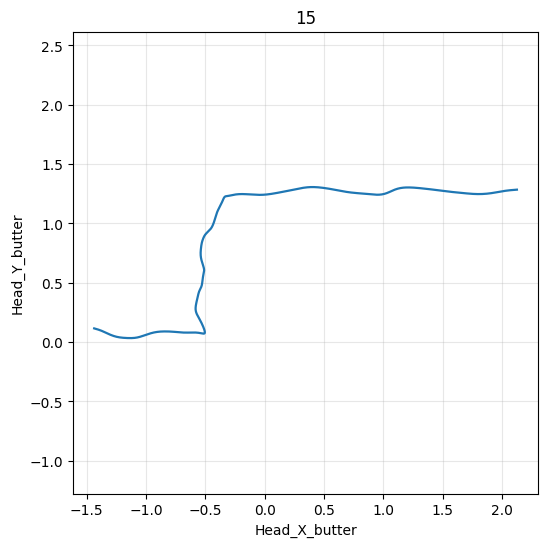

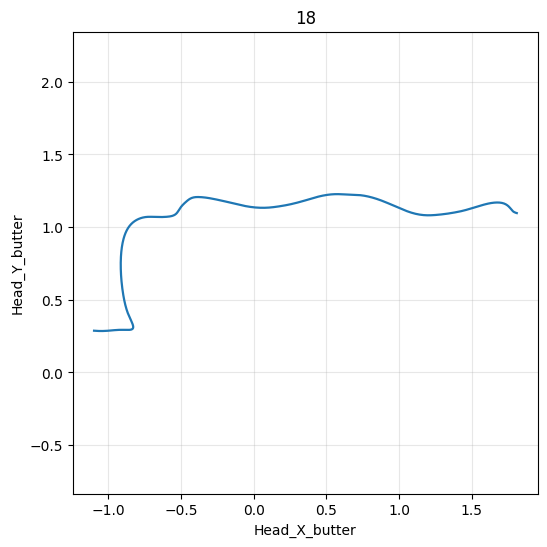

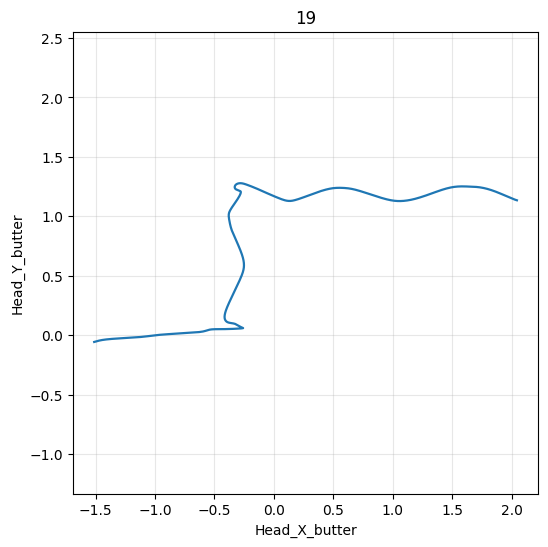

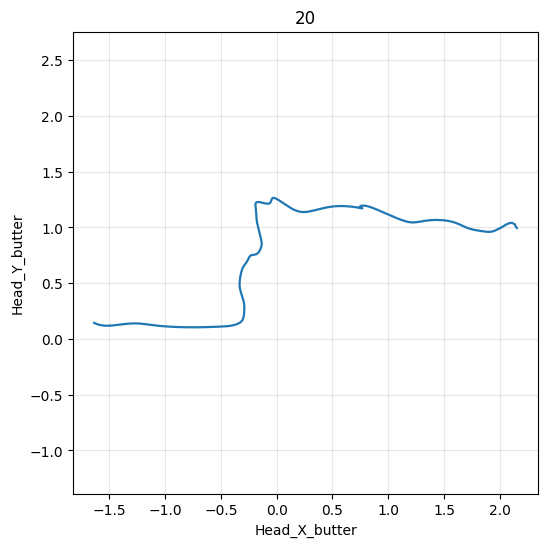

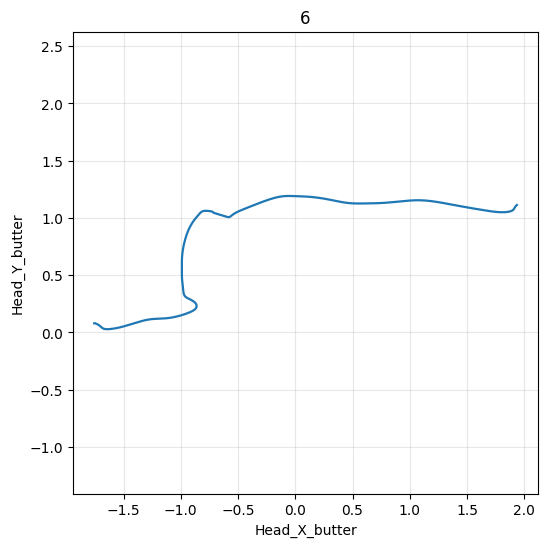

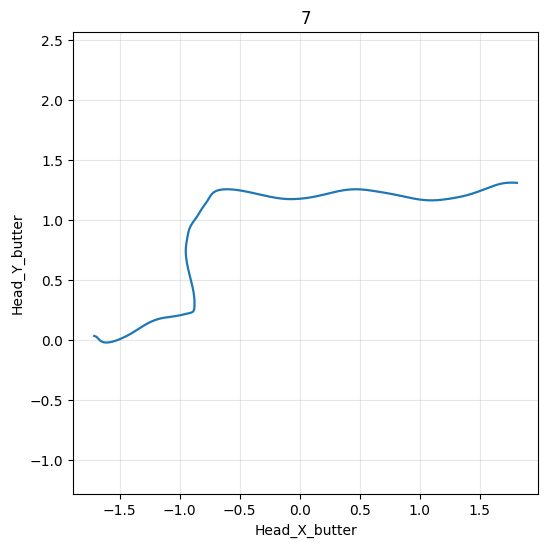

In [57]:
ROOT = r"D:\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\2nd_Braille Display\Final Participant Data\AB Participants\Path Trajectory\SR1S2"
PATTERN = "*_SR1S2_trimmed_segment*.csv"   # adjust if needed (e.g., "*_1L_trimmed_segment.csv")
OUTDIR = ROOT                           # or a subfolder like os.path.join(ROOT, "exports")
DIM = 2
rotation_matrix_back = np.array([[0, 1],
                                [-1, 0]])
rotation_matrix_back2 = np.array([[-1, 0],
                                [0, -1]])
rotated_only_participants = ["16", "19"]
rotated_only_participants2 = ["20"]

def extract_positions(df):
    needed = ["Head_X_butter", "Head_Y_butter"]
    missing = [c for c in needed if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns: {missing}. Found: {list(df.columns)}")
    XYZ = df[needed].to_numpy()
    XYZ = XYZ[~np.isnan(XYZ).any(axis=1)]
    return XYZ
# ----------------- Load files -----------------
files = glob.glob(os.path.join(ROOT, PATTERN))
if not files:
    raise FileNotFoundError(f"No files matched: {os.path.join(ROOT, PATTERN)}")
files = sorted(files)  # stable order

# Participant ID from randomized filenames (stem before "_1L_trimmed_segment")
def pid_from_path(fp):
    base = os.path.basename(fp)
    name = os.path.splitext(base)[0]
    stem = name
    for tag in ("_1L_trimmed_segment", "_1R_trimmed_segment","_2L_trimmed_segment", "_2R_trimmed_segment","_3L_trimmed_segment", "_3R_trimmed_segment",\
                 "_SL1M2_trimmed_segment","_SL1S2_trimmed_segment","_SR1F2_trimmed_segment","_SR1M2_trimmed_segment","_SR1S2_trimmed_segment"):
        if tag in name:
            stem = name.split(tag)[0]
            break
    m = re.search(r"(\d+)$", stem)  # grab trailing digits (e.g., 'ABParticipant18' -> '18', '17' -> '17')
    return m.group(1) if m else stem

files = glob.glob(os.path.join(ROOT, PATTERN))
if not files:
    raise FileNotFoundError(f"No files matched: {os.path.join(ROOT, PATTERN)}")
files = sorted(files)

# ----------------- Load trials -----------------
trials = []
pids_raw = []
for fp in files:
    df = pd.read_csv(fp, header=0, engine="python", encoding_errors="ignore")
    XYZ = extract_positions(df)
    if XYZ.shape[1] != DIM:
        raise ValueError(f"{os.path.basename(fp)}: expected DIM={DIM}, got {XYZ.shape[1]}")

    pid = pid_from_path(fp)  # now '12','13','15','17','5','7','8','9',...
    print(pid)

    # rotations by exact pid
    if pid in rotated_only_participants:
        XYZ = XYZ @ rotation_matrix_back
    if pid in rotated_only_participants2:
        XYZ = XYZ @ rotation_matrix_back2

    # exact-match adjustments (no accidental '15' when you mean '5')
    # if pid == "18": # only deleted for 2L,3L
    #     XYZ[:, 0] -= 0.25
    # if pid == "5":
    #     XYZ[:, 0] -= 0.25 # deleted only for 1R SL1F2
    # if pid == "17":     # only for 1R
    #     XYZ[:, 0] -= 0.25    # keep your current magnitude (you had -5)
    # if pid == "19":
    #     XYZ[:, 0] += 0.25 #only for 2L
    if pid == "19":
        XYZ[:, 0] += 0.5 #only for 2R

    # if pid == "14":
    #     XYZ[:, 0] += 0.25 # only for 2R,3R 
    if pid == "15":
        XYZ[:, 0] += 0.25 # only for 2R,3R 
    if pid == "13":
        XYZ[:, 0] += 0.25 # only for 3L SR1F2
    if pid == "17":
        XYZ[:, 0] += 0.25 # only for SR1F2

    if pid == "8":
        XYZ[:, 0] += 0.25 # only for SL1S2

    if pid == "20":
        XYZ[:, 0] += 0.75 
    # if pid == "20":
    #     XYZ[:, 0] += 0.25 #only for SL1M2

    # if pid == "9":
    #     XYZ[:, 0] += 0.5 #only for SL1F2

    trials.append(XYZ)
    pids_raw.append(pid)

for pid, XY in zip(pids_raw, trials):
    plt.figure(figsize=(6,6))
    plt.plot(XY[:,0], XY[:,1], lw=1.6)
    plt.title(f"{pid}")
    plt.xlabel("Head_X_butter")
    plt.ylabel("Head_Y_butter")
    plt.axis("equal")
    plt.grid(True, alpha=0.3)
    plt.show()


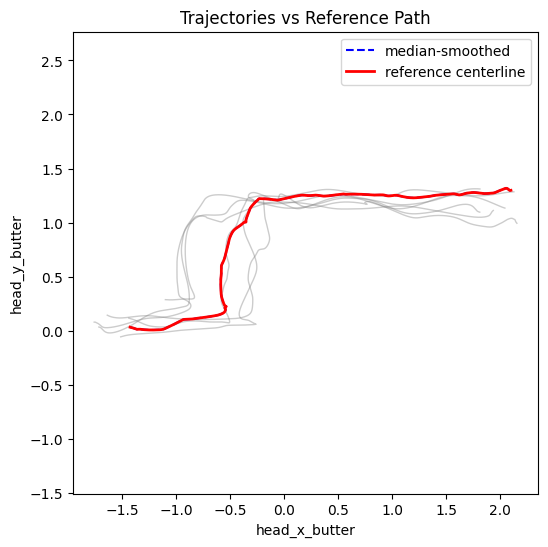

In [58]:
N_RESAMP = 200                             # resampled points to build provisional median
SPLINE_SMOOTH = 1e-6                       # spline smoothing in u (0≈interpolate)
CENTERLINE_POINTS = 600                    # number of points in the reference centerline
BIN_SIZE = 0.02                            # meters; for consensus offset (2D only)
STRICT_COLUMNS = True                      # enforce exact column names

# ----------------- Build reference centerline (Step B) -----------------
# 1) Resample each by arc length
resamp = [resample_by_arclen(T, N_RESAMP)[1] for T in trials]
# 2) Rigid align to template
template = resamp[0]
resamp_aligned = [template] + [procrustes_rigid(template, Xr) for Xr in resamp[1:]]
# 3) Median across trials → smooth in u → reparam by arc length
stack = np.stack(resamp_aligned, axis=2)   # N x D x K
medU = np.nanmedian(stack, axis=2)
u_common = np.linspace(0, 1, medU.shape[0])
_, C0 = smooth_over_u(medU, u_common, s_param=SPLINE_SMOOTH)
s_c, C_s = reparam_by_arclen(C0, M=CENTERLINE_POINTS)  # reference centerline (smoothed)

plt.figure(figsize=(6,6))
# plot each trial in light gray
for T in trials:
    plt.plot(T[:,0], T[:,1], color="gray", alpha=0.4, linewidth=1)

# plot resampled median path (rough)
plt.plot(C0[:,0], C0[:,1], 'b--', label="median-smoothed")

# plot final reference centerline
plt.plot(C_s[:,0], C_s[:,1], 'r-', linewidth=2, label="reference centerline")

plt.axis("equal")
plt.xlabel("head_x_butter")
plt.ylabel("head_y_butter")
plt.title("Trajectories vs Reference Path")
plt.legend()
plt.show()


In [9]:
from numpy.linalg import svd

def resample_by_arclen(XYZ, N=200):
    d = np.linalg.norm(np.diff(XYZ, axis=0), axis=1)
    s = np.concatenate([[0.0], np.cumsum(d)])
    if s[-1] == 0:
        # degenerate curve: repeat the point
        return np.linspace(0,1,N), np.repeat(XYZ[:1], N, axis=0)
    u = s / s[-1]
    u_common = np.linspace(0.0, 1.0, N)
    cols = []
    for i in range(XYZ.shape[1]):
        f = interp1d(u, XYZ[:, i], kind='cubic', fill_value="extrapolate", assume_sorted=True)
        cols.append(f(u_common))
    Xr = np.column_stack(cols)
    return u_common, Xr

def procrustes_align(A, B, anchor_to_template=False):
    """
    Align B to A by rigid transform (rotation + translation).
    If anchor_to_template=False, return zero-mean aligned shape (B0 @ R).
    If True, re-anchor to the template centroid ((B0 @ R) + A.mean(0)).
    """
    A0 = A - A.mean(0)
    B0 = B - B.mean(0)
    U, _, Vt = svd(B0.T @ A0)
    R = U @ Vt
    if np.linalg.det(R) < 0:
        U[:, -1] *= -1
        R = U @ Vt
    out = (B0 @ R)
    if anchor_to_template:
        out = out + A.mean(0)
    return out

def procrustes_dist(A, B):
    """RMS distance after optimal rigid alignment (translation+rotation)."""
    A0 = A - A.mean(0)
    B0 = B - B.mean(0)
    U, _, Vt = svd(B0.T @ A0)
    R = U @ Vt
    if np.linalg.det(R) < 0:
        U[:, -1] *= -1
        R = U @ Vt
    D = A0 - (B0 @ R)
    return np.sqrt((D**2).sum(axis=1).mean())

def choose_medoid_template(resampled_list):
    """Return index of medoid (row with minimum sum of pairwise Procrustes distances)."""
    K = len(resampled_list)
    D = np.zeros((K, K))
    for i in range(K):
        for j in range(i+1, K):
            dij = procrustes_dist(resampled_list[i], resampled_list[j])
            D[i, j] = D[j, i] = dij
    return np.argmin(D.sum(axis=1))

def smooth_over_u(points, u, s_param=1e-6):
    uu = np.linspace(0, 1, max(400, len(u)))
    sm = np.column_stack([splev(uu, splrep(u, points[:, j], s=s_param)) for j in range(points.shape[1])])
    return uu, sm

def reparam_by_arclen(C, M=600):
    d = np.linalg.norm(np.diff(C, axis=0), axis=1)
    s = np.concatenate([[0.0], np.cumsum(d)])
    L = s[-1]
    if L == 0:
        return np.linspace(0,1,M), np.repeat(C[:1], M, axis=0)
    s_uniform = np.linspace(0, L, M)
    Cr = np.column_stack([interp1d(s, C[:, j], kind='cubic')(s_uniform) for j in range(C.shape[1])])
    return s_uniform, Cr


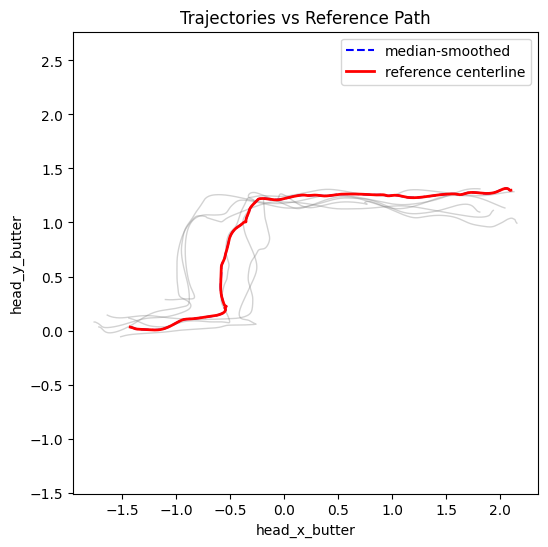

Medoid template index (0-based): 0


In [59]:
def build_reference_centerline(
    trials,
    N_RESAMP=200,
    SPLINE_SMOOTH=1e-6,
    CENTERLINE_POINTS=600,
    anchor_to_template=False,       # keep False: we will place globally at the end
    recenter_to_cloud=True          # True: place the final curve at the center of original cloud
):
    # 1) Resample each by arc length
    resamp = [resample_by_arclen(T, N_RESAMP)[1] for T in trials]

    # 2) Choose medoid template (most representative trial)
    medoid_idx = choose_medoid_template(resamp)
    template = resamp[medoid_idx]

    # 3) Rigid-align all resampled curves to the template
    resamp_aligned = [procrustes_align(template, Xr, anchor_to_template=anchor_to_template)
                      for Xr in resamp]

    # 4) Median across aligned trials → smooth in u
    stack = np.stack(resamp_aligned, axis=2)   # N x D x K
    medU = np.nanmedian(stack, axis=2)
    u_common = np.linspace(0, 1, medU.shape[0])
    _, C0 = smooth_over_u(medU, u_common, s_param=SPLINE_SMOOTH)  # median-smoothed curve

    # 5) Choose global placement
    if recenter_to_cloud:
        # center to the middle of the ORIGINAL (un-aligned) cloud so it overlays gray traces nicely
        cloud_center = np.concatenate(trials, axis=0).mean(axis=0)
        C0_center = C0.mean(axis=0)
        C0 = C0 + (cloud_center - C0_center)

    # 6) Re-parametrize by arc length → final reference centerline
    s_c, C_s = reparam_by_arclen(C0, M=CENTERLINE_POINTS)

    return {
        "template_index": medoid_idx,
        "aligned_resampled": resamp_aligned,
        "median_smoothed": C0,      # (possibly re-centered) median-smoothed curve
        "s_centerline": s_c,
        "centerline": C_s
    }

# ---------- Run it on your trials and plot ----------
params = dict(N_RESAMP=200, SPLINE_SMOOTH=1e-4, CENTERLINE_POINTS=600,
              anchor_to_template=True, recenter_to_cloud=False)

ref = build_reference_centerline(trials, **params)
C0 = ref["median_smoothed"]
C_s = ref["centerline"]
df_centerline = pd.DataFrame(C_s, columns=["x", "y"])

OUTDIR = r"D:\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\2nd_Braille Display\Final Participant Data\AB Participants\Path Trajectory\SR1S2"
os.makedirs(OUTDIR, exist_ok=True)
tag = "SR1S2"

fn_centerline = os.path.join(OUTDIR, f"reference_centerline_{tag}.csv")
pd.DataFrame(C_s, columns=["x", "y"]).to_csv(fn_centerline, index=False)

plt.figure(figsize=(6,6))
for T in trials:
    plt.plot(T[:,0], T[:,1], color="gray", alpha=0.35, linewidth=1)

plt.plot(C0[:,0], C0[:,1], 'b--', label="median-smoothed")
plt.plot(C_s[:,0], C_s[:,1], 'r-', linewidth=2, label="reference centerline")

plt.axis("equal")
plt.xlabel("head_x_butter")
plt.ylabel("head_y_butter")
plt.title("Trajectories vs Reference Path")
plt.legend()
plt.show()

print("Medoid template index (0-based):", ref["template_index"])


Medoid template index (0-based): 10


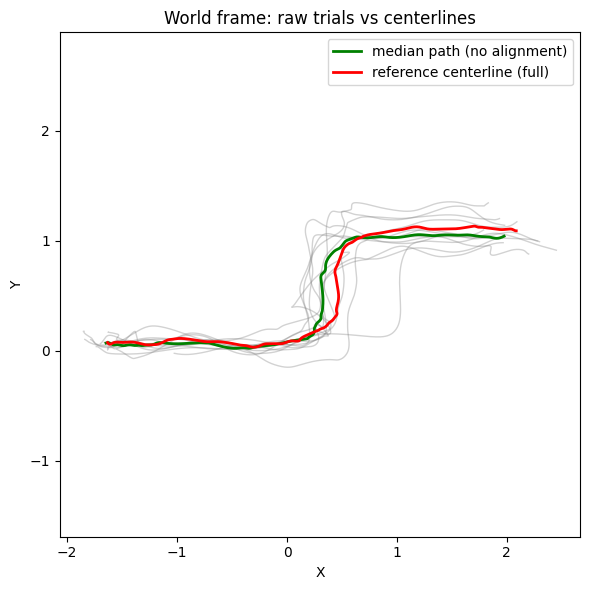

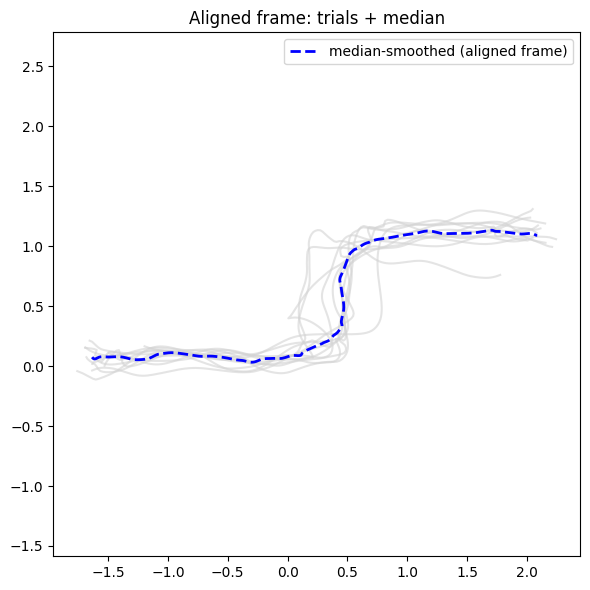

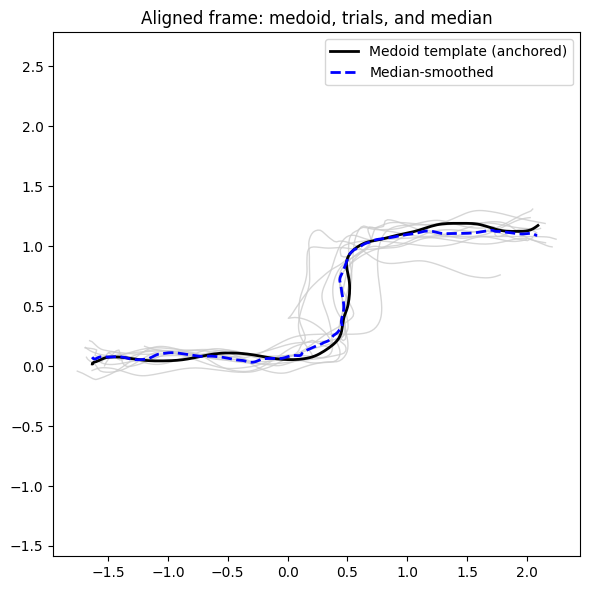

In [55]:
# === Complete reference centerline demo ===
# - Uses your pipeline
# - Adds: direction consistency, no-alignment comparison, and plots

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from scipy.interpolate import interp1d, splrep, splev

# -------------------------------------------------------------------
# Utilities
# -------------------------------------------------------------------
def resample_by_arclen(XYZ, N=200):
    """Resample a polyline XYZ (N0 x D) to N points equally spaced by arc-length."""
    if XYZ.shape[0] < 2:
        return np.linspace(0,1,N), np.repeat(XYZ[:1], N, axis=0)

    d = np.linalg.norm(np.diff(XYZ, axis=0), axis=1)
    s = np.concatenate([[0.0], np.cumsum(d)])
    L = s[-1]
    if L == 0:
        return np.linspace(0,1,N), np.repeat(XYZ[:1], N, axis=0)
    u = s / L
    u_common = np.linspace(0.0, 1.0, N)
    cols = []
    # TIP: switch kind to 'linear' if cubic overshoots your corners
    for i in range(XYZ.shape[1]):
        f = interp1d(u, XYZ[:, i], kind='cubic', fill_value="extrapolate", assume_sorted=True)
        cols.append(f(u_common))
    Xr = np.column_stack(cols)
    return u_common, Xr

def procrustes_align(A, B, anchor_to_template=False):
    """
    Align B to A by optimal rigid transform (rotation + translation).
    Returns aligned B in either zero-mean frame or anchored to A's centroid.
    """
    A0 = A - A.mean(0)
    B0 = B - B.mean(0)
    U, _, Vt = svd(B0.T @ A0)
    R = U @ Vt
    # fix improper rotation (reflection)
    if np.linalg.det(R) < 0:
        U[:, -1] *= -1
        R = U @ Vt
    out = (B0 @ R)
    if anchor_to_template:
        out = out + A.mean(0)
    return out

def procrustes_dist(A, B):
    """RMS distance after optimal rigid alignment (translation+rotation)."""
    A0 = A - A.mean(0)
    B0 = B - B.mean(0)
    U, _, Vt = svd(B0.T @ A0)
    R = U @ Vt
    if np.linalg.det(R) < 0:
        U[:, -1] *= -1
        R = U @ Vt
    D = A0 - (B0 @ R)
    return np.sqrt((D**2).sum(axis=1).mean())

def choose_medoid_template(resampled_list):
    """Index of the medoid under Procrustes distance."""
    K = len(resampled_list)
    Dm = np.zeros((K, K))
    for i in range(K):
        for j in range(i+1, K):
            dij = procrustes_dist(resampled_list[i], resampled_list[j])
            Dm[i, j] = Dm[j, i] = dij
    return np.argmin(Dm.sum(axis=1))

def smooth_over_u(points, u, s_param=1e-6):
    """Spline-smooth points vs parameter u; returns dense uu and smoothed curve."""
    uu = np.linspace(0, 1, max(400, len(u)))
    sm = np.column_stack([splev(uu, splrep(u, points[:, j], s=s_param)) for j in range(points.shape[1])])
    return uu, sm

def reparam_by_arclen(C, M=600):
    """Reparameterize curve C (N x D) by arc length; return M equally spaced points."""
    if C.shape[0] < 2:
        return np.linspace(0,1,M), np.repeat(C[:1], M, axis=0)
    d = np.linalg.norm(np.diff(C, axis=0), axis=1)
    s = np.concatenate([[0.0], np.cumsum(d)])
    L = s[-1]
    if L == 0:
        return np.linspace(0,1,M), np.repeat(C[:1], M, axis=0)
    s_uniform = np.linspace(0, L, M)
    Cr = np.column_stack([interp1d(s, C[:, j], kind='cubic')(s_uniform) for j in range(C.shape[1])])
    return s_uniform, Cr

def ensure_same_direction(template, Xr):
    """Flip Xr if its start is farther from template start than its end is."""
    d0 = np.linalg.norm(Xr[0]  - template[0])
    d1 = np.linalg.norm(Xr[-1] - template[0])
    return Xr if d0 <= d1 else Xr[::-1]

# -------------------------------------------------------------------
# Your function (unchanged)
# -------------------------------------------------------------------
def build_reference_centerline(
    trials,
    N_RESAMP=200,
    SPLINE_SMOOTH=1e-6,
    CENTERLINE_POINTS=600,
    anchor_to_template=False,       # keep False: we will place globally at the end
    recenter_to_cloud=True          # True: place the final curve at the center of original cloud
):
    # 1) Resample each by arc length
    resamp = [resample_by_arclen(T, N_RESAMP)[1] for T in trials]

    # 2) Choose medoid template (most representative trial)
    medoid_idx = choose_medoid_template(resamp)
    template = resamp[medoid_idx]

    # (Optional but recommended) enforce same direction as template
    resamp = [ensure_same_direction(template, Xr) for Xr in resamp]

    # 3) Rigid-align all resampled curves to the template
    resamp_aligned = [procrustes_align(template, Xr, anchor_to_template=anchor_to_template)
                      for Xr in resamp]

    # 4) Median across aligned trials → smooth in u
    stack = np.stack(resamp_aligned, axis=2)   # N x D x K
    medU = np.nanmedian(stack, axis=2)
    u_common = np.linspace(0, 1, medU.shape[0])
    _, C0 = smooth_over_u(medU, u_common, s_param=SPLINE_SMOOTH)  # median-smoothed curve

    # 5) Choose global placement
    if recenter_to_cloud:
        # center to the middle of the ORIGINAL (un-aligned) cloud so it overlays gray traces nicely
        cloud_center = np.concatenate(trials, axis=0).mean(axis=0)
        C0_center = C0.mean(axis=0)
        C0 = C0 + (cloud_center - C0_center)

    # 6) Re-parametrize by arc length → final reference centerline
    s_c, C_s = reparam_by_arclen(C0, M=CENTERLINE_POINTS)

    return {
        "template_index": medoid_idx,
        "aligned_resampled": resamp_aligned,
        "median_smoothed": C0,      # (possibly re-centered) median-smoothed curve
        "s_centerline": s_c,
        "centerline": C_s
    }

# -------------------------------------------------------------------
# No-alignment (short) pipeline for comparison
# -------------------------------------------------------------------
def centerline_no_alignment(trials, N_RESAMP=200, SPLINE_SMOOTH=1e-4, CENTERLINE_POINTS=600):
    resamp = [resample_by_arclen(T, N_RESAMP)[1] for T in trials]
    stack  = np.stack(resamp, axis=2)             # (N,D,K)
    medU   = np.nanmedian(stack, axis=2)          # (N,D)
    u_common = np.linspace(0, 1, medU.shape[0])
    _, C0 = smooth_over_u(medU, u_common, s_param=SPLINE_SMOOTH)
    _, C_s = reparam_by_arclen(C0, M=CENTERLINE_POINTS)
    return C0, C_s

# -------------------------------------------------------------------
# Demo runner
# -------------------------------------------------------------------
def _make_synthetic_trials(K=10, noise=0.02, rotations=True, shifts=True):
    """Create synthetic 'L' shaped paths with small rotation/shift/noise to test."""
    base = np.vstack([
        np.column_stack([np.linspace(0,1,120), np.zeros(120)]),
        np.column_stack([np.ones(80), np.linspace(0,1,80)])
    ])  # an "L" polyline (200 pts total)
    trials = []
    rng = np.random.default_rng(0)
    for k in range(K):
        X = base.copy()
        # jitter
        X += rng.normal(0, noise, size=X.shape)
        # rotate
        if rotations:
            theta = rng.normal(0, np.deg2rad(6))
            R = np.array([[np.cos(theta), -np.sin(theta)],
                          [np.sin(theta),  np.cos(theta)]])
            X = X @ R.T
        # shift
        if shifts:
            shift = rng.normal(0, 0.05, size=(1,2))
            X = X + shift
        trials.append(X)
    return trials

if __name__ == "__main__":
    # Use existing `trials` if present; otherwise synthesize
    try:
        trials
    except NameError:
        trials = _make_synthetic_trials(K=10)

    # ==== FULL PIPELINE (your settings here) ====
    params = dict(N_RESAMP=200, SPLINE_SMOOTH=1e-4, CENTERLINE_POINTS=600,
                  anchor_to_template=True,  # recommended for overlay
                  recenter_to_cloud=False)

    ref = build_reference_centerline(trials, **params)
    C0_full = ref["median_smoothed"]
    C_s_full = ref["centerline"]
    medoid_idx = ref["template_index"]
    print("Medoid template index (0-based):", medoid_idx)

    # ==== SHORT PIPELINE (no alignment) ====
    C0_short, C_s_short = centerline_no_alignment(
        trials, N_RESAMP=200, SPLINE_SMOOTH=1e-4, CENTERLINE_POINTS=600
    )

    # ---- Plot 1: World frame (raw) vs both centerlines ----
    plt.figure(figsize=(6,6))
    for T in trials:
        plt.plot(T[:,0], T[:,1], color="gray", alpha=0.35, lw=1)
    plt.plot(C_s_short[:,0], C_s_short[:,1], 'g-', lw=2, label="median path (no alignment)")
    plt.plot(C_s_full[:,0],  C_s_full[:,1],  'r-', lw=2, label="reference centerline (full)")
    plt.axis("equal")
    plt.xlabel("X"); plt.ylabel("Y")
    plt.title("World frame: raw trials vs centerlines")
    plt.legend(); plt.tight_layout(); plt.show()

    # ---- Plot 2: Aligned frame sanity check ----
    plt.figure(figsize=(6,6))
    for Xr in ref["aligned_resampled"]:
        plt.plot(Xr[:,0], Xr[:,1], color='lightgray', alpha=0.6)
    plt.plot(C0_full[:,0], C0_full[:,1], 'b--', lw=2, label="median-smoothed (aligned frame)")
    plt.axis('equal'); plt.title('Aligned frame: trials + median')
    plt.legend(); plt.tight_layout(); plt.show()

    # ---- Plot 3: Show the chosen template against aligned trials ----
    # Recreate the template in the same (anchored) frame for visualization
    # Since anchor_to_template=True, procrustes_align(template, template, True) returns template (anchored)
    resamp_all = [resample_by_arclen(T, params["N_RESAMP"])[1] for T in trials]
    template = resamp_all[medoid_idx]
    template_aligned = procrustes_align(template, template, anchor_to_template=True)

    plt.figure(figsize=(6,6))
    for Xr in ref["aligned_resampled"]:
        plt.plot(Xr[:,0], Xr[:,1], color='#cccccc', alpha=0.8, lw=1)
    plt.plot(template_aligned[:,0], template_aligned[:,1], 'k-', lw=2, label="Medoid template (anchored)")
    plt.plot(C0_full[:,0], C0_full[:,1], 'b--', lw=2, label="Median-smoothed")
    plt.axis('equal'); plt.title('Aligned frame: medoid, trials, and median')
    plt.legend(); plt.tight_layout(); plt.show()


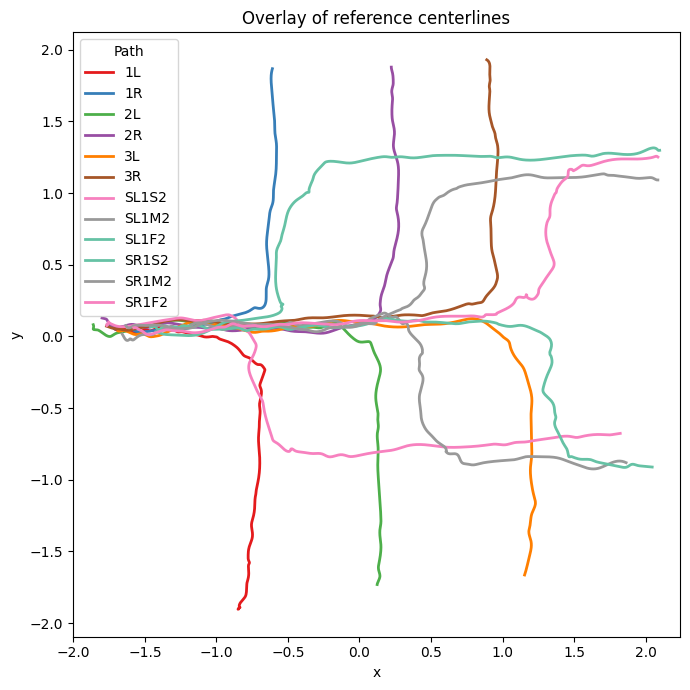

In [2]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt

BASE = r"D:\Box Sync\00_BEAR_Lab\Projects\Kyler(Kihun) Hong\2nd_Braille Display\Final Participant Data\AB Participants\Path Trajectory"
TAGS = ["1L","1R","2L","2R","3L","3R","SL1S2","SL1M2","SL1F2","SR1S2","SR1M2","SR1F2"]
COLOR = {"1L":"#e41a1c","1R":"#377eb8","2L":"#4daf4a","2R":"#984ea3","3L":"#ff7f00","3R":"#a65628","SL1S2":"#f781bf","SL1M2":"#999999","SL1F2":"#66c2a5",\
         "SR1S2":"#66c2a5","SR1M2":"#999999","SR1F2":"#f781bf"}      

def load_centerline(folder, tag):
    names = [
        f"reference_center_line_{tag}.csv",
        f"reference_centerline_{tag}.csv",
        f"reference_center_line_{tag}",
        f"reference_centerline_{tag}",
        f"reference_center_line_{tag}.npy",
        f"reference_centerline_{tag}.npy",
    ]
    for n in names:
        fp = os.path.join(folder, n)
        if os.path.exists(fp):
            if fp.endswith(".npy"):
                XY = np.load(fp)
                return XY[:,0], XY[:,1]
            else:
                df = pd.read_csv(fp)
                if set(["x","y"]).issubset(df.columns):
                    return df["x"].values, df["y"].values
                # fallback: first two numeric columns   
                cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.number)]
                if len(cols) >= 2:
                    return df[cols[0]].values, df[cols[1]].values
    return None, None

plt.figure(figsize=(7,7))
found_any = False
for tag in TAGS:
    folder = os.path.join(BASE, tag)
    x, y = load_centerline(folder, tag)
    if x is None:
        print(f"[skip] No reference file found for {tag} in {folder}")
        continue
    found_any = True
    plt.plot(x, y, lw=2, label=tag, color=COLOR.get(tag, None))

if not found_any:
    raise FileNotFoundError("No reference centerline files found for any tag.")

plt.axis('equal'); plt.legend(title="Path")
plt.title("Overlay of reference centerlines")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout()
plt.show()


In [3]:
def objective_turn_slope_free(params, X, Y, xt_init, yt_init):
    xt, yt, angle1, angle2 = params
    x0, y0 = X[0], Y[0]
    x2, y2 = X[-1], Y[-1]

    dx1, dy1 = np.cos(angle1), np.sin(angle1)
    dx2, dy2 = np.cos(angle2), np.sin(angle2)

    len1 = np.hypot(xt - x0, yt - y0)
    len2 = np.hypot(x2 - xt, y2 - yt)

    error = 0.0
    for x, y in zip(X, Y):
        d1 = point_to_ray_dist(x, y, x0, y0, dx1, dy1, len1)
        d2 = point_to_ray_dist(x, y, xt, yt, dx2, dy2, len2)
        error += min(d1, d2) ** 2

    # ✅ Now the initial guess is passed as arguments
    penalty = 10 * ((xt - xt_init) ** 2 + (yt - yt_init) ** 2)
    error += penalty

    return error


def point_to_ray_dist(px, py, x1, y1, dx, dy, length):
    if dx == dy == 0:
        return np.hypot(px - x1, py - y1)
    t = ((px - x1) * dx + (py - y1) * dy) / (dx**2 + dy**2)
    t = max(0, min(length, t))  # clamp t to segment length (in direction vector units)
    proj_x = x1 + t * dx
    proj_y = y1 + t * dy
    return np.hypot(px - proj_x, py - proj_y)

def objective_two_turns(params, X, Y, xt1_init, yt1_init, xt2_init, yt2_init):
    xt1, yt1, xt2, yt2, angle1, angle2, angle3 = params
    x0, y0 = X[0], Y[0]
    x3, y3 = X[-1], Y[-1]

    # Segment directions
    dx1, dy1 = np.cos(angle1), np.sin(angle1)
    dx2, dy2 = np.cos(angle2), np.sin(angle2)
    dx3, dy3 = np.cos(angle3), np.sin(angle3)

    # Segment lengths
    len1 = np.hypot(xt1 - x0, yt1 - y0)
    len2 = np.hypot(xt2 - xt1, yt2 - yt1)
    len3 = np.hypot(x3 - xt2, y3 - yt2)

    error = 0.0
    for x, y in zip(X, Y):
        d1 = point_to_ray_dist(x, y, x0, y0, dx1, dy1, len1)
        d2 = point_to_ray_dist(x, y, xt1, yt1, dx2, dy2, len2)
        d3 = point_to_ray_dist(x, y, xt2, yt2, dx3, dy3, len3)
        error += min(d1, d2, d3)**2

    # Penalty to keep turns close to initial guess
    penalty = 10 * ((xt1 - xt1_init)**2 + (yt1 - yt1_init)**2 +
                    (xt2 - xt2_init)**2 + (yt2 - yt2_init)**2)
    return error + penalty


In [ ]:



turn_idx = 571

x_turn_init = X[turn_idx]
y_turn_init = Y[turn_idx] 
agnle1_init = np.arctan2(Y[turn_idx] - Y[0], X[turn_idx] - X[0])  # slope of first segment
angle2_init = np.arctan2(Y[-1] - Y[turn_idx], X[-1] - X[turn_idx])  # slope of second segment
init_guess_free_slope = [x_turn_init, y_turn_init, agnle1_init, angle2_init]
bounds = [
    (x_turn_init - 0.1, x_turn_init + 0.1),  # xt
    (y_turn_init - 0.1, y_turn_init + 0.1),  # yt
    (-np.pi, np.pi),                         # angle1
    (-np.pi, np.pi)                          # angle2
]

result = minimize(objective_turn_slope_free, init_guess_free_slope,  args=(X, Y, x_turn_init, y_turn_init), method='SLSQP', bounds=bounds)

xt_opt, yt_opt, angle1_opt, angle2_opt = result.x

starting_idx = 800
second_turn_idx = 1062    
x_turn_init_f = X[starting_idx] 
y_turn_init_f = Y[starting_idx]
agnle1_init_f = np.arctan2(Y[starting_idx] - Y[0], X[starting_idx] - X[0])  # slope of first segment
x_turn_init_s = X[second_turn_idx]
y_turn_init_s = Y[second_turn_idx]  
agnle2_init_s = np.arctan2(Y[second_turn_idx] - Y[starting_idx], X[second_turn_idx] - X[starting_idx])  # slope of second segment
angle3_init = np.arctan2(Y[-1] - Y[second_turn_idx], X[-1] - X[second_turn_idx])  # slope of third segment  
init_guess_two_turns = [x_turn_init_f, y_turn_init_f, x_turn_init_s, y_turn_init_s, agnle1_init_f, agnle2_init_s, angle3_init]  # angle3 is zero for now
bounds = [
    (x_turn_init_f - 0.1, x_turn_init_f + 0.1),  # xt1
    (y_turn_init_f - 0.1, y_turn_init_f + 0.1),  # yt1
    (x_turn_init_s - 0.1, x_turn_init_s + 0.1),  # xt2
    (y_turn_init_s - 0.1, y_turn_init_s + 0.1),  # yt2
    (-np.pi, np.pi),                         # angle1               
    (-np.pi, np.pi),                         # angle2
    (-np.pi, np.pi)                          # angle3]
] 
result_two = minimize(objective_two_turns, init_guess_two_turns, args=(X, Y, x_turn_init_f, y_turn_init_f, x_turn_init_s, y_turn_init_s), method='SLSQP', bounds=bounds)
xt_opt1, yt_opt1, xt_opt2, yt_opt2, angle1_opt2, angle2_opt2, angle3_opt2 = result_two.x    

NameError: name 'X' is not defined

In [3]:
import numpy as np

def _heading_angles(X, Y, smooth=True, window=5):
    # optional smoothing for noisy paths
    if smooth and window > 1:
        from scipy.signal import savgol_filter
        Xs = savgol_filter(X, window_length=max(5, window|1), polyorder=2, mode='interp')
        Ys = savgol_filter(Y, window_length=max(5, window|1), polyorder=2, mode='interp')
    else:
        Xs, Ys = X, Y

    dX = np.diff(Xs)
    dY = np.diff(Ys)
    # avoid zero-length steps
    eps = 1e-12
    ang = np.arctan2(dY + eps, dX + eps)          # angle of each segment
    turn = np.diff(ang)                            # heading change at interior vertices
    # wrap to [-pi, pi]
    turn = (turn + np.pi) % (2*np.pi) - np.pi
    return turn  # length: len(X)-2 (turn at indices 1..n-2)

def _top_k_bends(X, Y, k=1, min_gap=5):
    """Return k interior indices with largest heading magnitude, spread out by min_gap samples."""
    turn = _heading_angles(X, Y)
    mags = np.abs(turn)
    # map turn indices back to point indices (turn[i] corresponds to vertex i+1)
    idxs = np.arange(1, len(X)-1)
    chosen = []
    used = np.zeros_like(mags, dtype=bool)
    for _ in range(k):
        # ignore neighbors around already-chosen picks
        mask = ~used
        if not mask.any():
            break
        i = np.argmax(mags * mask)
        chosen.append(idxs[i])
        # block a neighborhood to avoid picking clustered points
        lo = max(0, i - min_gap)
        hi = min(len(mags), i + min_gap + 1)
        used[lo:hi] = True
    chosen.sort()
    return chosen

def guess_one_turn(X, Y):
    i = _top_k_bends(X, Y, k=1, min_gap=max(3, len(X)//50))
    if not i:
        # fallback: largest perpendicular distance to the chord
        i = [np.argmax(_point_to_line_distances(X, Y, 0, len(X)-1))]
    i = i[0]
    xt, yt = X[i], Y[i]
    angle1 = np.arctan2(yt - Y[0], xt - X[0])
    angle2 = np.arctan2(Y[-1] - yt, X[-1] - xt)
    return (xt, yt, angle1, angle2), i

def guess_two_turns(X, Y):
    # pick two spread-out bends
    min_gap = max(3, len(X)//50)
    picks = _top_k_bends(X, Y, k=2, min_gap=min_gap)
    if len(picks) < 2:
        # fallback: recursive RDP-style split
        first = _argmax_line_dist(X, Y, 0, len(X)-1)
        second = _argmax_line_dist(X, Y, 0, first) if first > (0 + 5) else _argmax_line_dist(X, Y, first, len(X)-1)
        picks = sorted([first, second])
    i1, i2 = picks
    xt1, yt1 = X[i1], Y[i1]
    xt2, yt2 = X[i2], Y[i2]
    angle1 = np.arctan2(yt1 - Y[0],  xt1 - X[0])
    angle2 = np.arctan2(yt2 - yt1,   xt2 - xt1)
    angle3 = np.arctan2(Y[-1] - yt2, X[-1] - xt2)
    return (xt1, yt1, xt2, yt2, angle1, angle2, angle3), (i1, i2)

def _point_to_line_distances(X, Y, i0, i1):
    # distance of each point to the line through endpoints (i0,i1)
    x0, y0 = X[i0], Y[i0]
    x1, y1 = X[i1], Y[i1]
    vx, vy = x1 - x0, y1 - y0
    denom = np.hypot(vx, vy) + 1e-12
    # cross product magnitude divided by |v|
    return np.abs(vx*(Y - y0) - vy*(X - x0)) / denom

def _argmax_line_dist(X, Y, i0, i1):
    d = _point_to_line_distances(X, Y, i0, i1)
    d[:i0+1] = -1
    d[i1:]   = -1
    return int(np.argmax(d))


In [4]:
def objective_turn_slope_free(params, X, Y, xt_init, yt_init,
                              prior_w=0.6, snap_w=0.12):
    xt, yt, angle1, angle2 = params
    x0, y0 = X[0], Y[0]
    x2, y2 = X[-1], Y[-1]

    dx1, dy1 = np.cos(angle1), np.sin(angle1)
    dx2, dy2 = np.cos(angle2), np.sin(angle2)

    len1 = np.hypot(xt - x0, yt - y0)
    len2 = np.hypot(x2 - xt, y2 - yt)

    err = 0.0
    for xx, yy in zip(X, Y):
        t1 = ((xx - x0)*dx1 + (yy - y0)*dy1) / (dx1*dx1 + dy1*dy1 + 1e-12)
        t1 = np.clip(t1, 0.0, len1)
        d1 = np.hypot(xx - (x0 + t1*dx1), yy - (y0 + t1*dy1))

        t2 = ((xx - xt)*dx2 + (yy - yt)*dy2) / (dx2*dx2 + dy2*dy2 + 1e-12)
        t2 = np.clip(t2, 0.0, len2)
        d2 = np.hypot(xx - (xt + t2*dx2), yy - (yt + t2*dy2))

        err += min(d1, d2)**2

    # scale-aware weights
    scale = np.hypot(np.ptp(X), np.ptp(Y))

    # (1) keep near guessed bend (stronger than before)
    err += prior_w * (scale**2) * ((xt - xt_init)**2 + (yt - yt_init)**2)

    # (2) snap toward nearest sample point (prevents drift along long leg)
    d2_samples = (X - xt)**2 + (Y - yt)**2
    err += snap_w * (scale**2) * np.min(d2_samples)

    # (optional) discourage straight-through
    delta = np.arctan2(np.sin(angle2 - angle1), np.cos(angle2 - angle1))
    err += 0.01 * (np.cos(delta))**2
    return err

# --- fit helper (no plotting) ---
def fit_one_turn(x, y, end_margin=7, bounds_pad=0.0):
    """
    Fit one-turn polyline (start->turn->end) to trajectory (x,y).
    Returns: dict with fitted params and optimizer result.
    """
    if x is None or y is None or len(x) < 3:
        return {"success": False, "message": "empty or too-short track"}

    # initial guess from your bend finder
    (xt, yt, a1, a2), idx = guess_one_turn(x, y, smooth=True, window=7)

    # bounds (optionally padded)
    xmin, xmax = float(np.min(x)), float(np.max(x))
    ymin, ymax = float(np.min(y)), float(np.max(y))
    padx = bounds_pad * (xmax - xmin)
    pady = bounds_pad * (ymax - ymin)
    bounds = [
        (xmin - padx, xmax + padx),  # xt
        (ymin - pady, ymax + pady),  # yt
        (-np.pi, np.pi),             # angle1
        (-np.pi, np.pi),             # angle2
    ]

    p0 = np.array([xt, yt, a1, a2])
    res = minimize(
        objective_turn_slope_free,
        p0,
        args=(x, y, xt, yt),
        bounds=bounds,
        method="L-BFGS-B"
    )

    if res.success:
        xtf, ytf, a1f, a2f = res.x
        msg = "ok"
    else:
        # fall back to init if optimizer fails
        xtf, ytf, a1f, a2f = p0
        msg = f"optimizer failed: {res.message}"

    return {
        "success": True,
        "message": msg,
        "xt": xtf, "yt": ytf, "angle1": a1f, "angle2": a2f,
        "init_xt": xt, "init_yt": yt, "init_angle1": a1, "init_angle2": a2,
        "turn_index_guess": int(idx),
        "result": res,
    }

# --- per-tag runner (no plotting; you can print/save as you like) ---
def run_one_turn_for_tag(BASE, tag):
    folder = os.path.join(BASE, tag)
    x, y = load_centerline(folder, tag)
    out = fit_one_turn(x, y)
    out["tag"] = tag
    return out


In [5]:
def objective_turn_slope_free(params, X, Y, xt_init, yt_init, prior_w=0.6, snap_w=0.12):
    xt, yt, angle1, angle2 = params
    x0, y0 = X[0], Y[0]
    x2, y2 = X[-1], Y[-1]

    dx1, dy1 = np.cos(angle1), np.sin(angle1)
    dx2, dy2 = np.cos(angle2), np.sin(angle2)

    len1 = np.hypot(xt - x0, yt - y0)
    len2 = np.hypot(x2 - xt, y2 - yt)

    err = 0.0
    for xx, yy in zip(X, Y):
        t1 = ((xx - x0)*dx1 + (yy - y0)*dy1) / (dx1*dx1 + dy1*dy1 + 1e-12)
        t1 = np.clip(t1, 0.0, len1)
        d1 = np.hypot(xx - (x0 + t1*dx1), yy - (y0 + t1*dy1))

        t2 = ((xx - xt)*dx2 + (yy - yt)*dy2) / (dx2*dx2 + dy2*dy2 + 1e-12)
        t2 = np.clip(t2, 0.0, len2)
        d2 = np.hypot(xx - (xt + t2*dx2), yy - (yt + t2*dy2))

        err += min(d1, d2)**2

    scale = np.hypot(np.ptp(X), np.ptp(Y))
    err += prior_w * (scale**2) * ((xt - xt_init)**2 + (yt - yt_init)**2)
    err += snap_w * (scale**2) * np.min((X - xt)**2 + (Y - yt)**2)

    delta = np.arctan2(np.sin(angle2 - angle1), np.cos(angle2 - angle1))
    err += 0.01 * (np.cos(delta))**2
    return err

# --- error for discrete candidate (used by indexed search) ---
def _one_turn_error(X, Y, xt, yt, a1, a2):
    x0, y0 = X[0], Y[0]
    x2, y2 = X[-1], Y[-1]
    dx1, dy1 = np.cos(a1), np.sin(a1)
    dx2, dy2 = np.cos(a2), np.sin(a2)
    len1 = np.hypot(xt - x0, yt - y0)
    len2 = np.hypot(x2 - xt, y2 - yt)

    err = 0.0
    for xx, yy in zip(X, Y):
        t1 = ((xx - x0)*dx1 + (yy - y0)*dy1) / (dx1*dx1 + dy1*dy1 + 1e-12)
        t1 = np.clip(t1, 0.0, len1)
        d1 = np.hypot(xx - (x0 + t1*dx1), yy - (y0 + t1*dy1))

        t2 = ((xx - xt)*dx2 + (yy - yt)*dy2) / (dx2*dx2 + dy2*dy2 + 1e-12)
        t2 = np.clip(t2, 0.0, len2)
        d2 = np.hypot(xx - (xt + t2*dx2), yy - (yt + t2*dy2))

        err += min(d1, d2)**2
    return err

# --- discrete indexed one-turn fit (optionally refine a little) ---
def fit_one_turn_indexed(X, Y, end_margin=7, search_window=20, refine=False):
    # Your guess_one_turn doesn't take end_margin; don't pass it.
    (xtg, ytg, a1g, a2g), i0 = guess_one_turn(X, Y)

    # Apply end margins in the search range instead
    i_lo = max(end_margin, i0 - search_window)
    i_hi = min(len(X) - 1 - end_margin, i0 + search_window)

    best = None
    best_err = np.inf
    for i in range(i_lo, i_hi + 1):
        xt, yt = X[i], Y[i]
        a1 = np.arctan2(yt - Y[0],  xt - X[0])
        a2 = np.arctan2(Y[-1] - yt, X[-1] - xt)
        e = _one_turn_error(X, Y, xt, yt, a1, a2)
        if e < best_err:
            best_err = e
            best = (i, xt, yt, a1, a2)

    i_best, xt_best, yt_best, a1_best, a2_best = best

    if not refine:
        return {
            "turn_index": int(i_best),
            "xt": xt_best, "yt": yt_best,
            "angle1": a1_best, "angle2": a2_best,
            "message": "discrete"
        }

    # optional small continuous refine (won't drift far due to strong priors)
    p0 = np.array([xt_best, yt_best, a1_best, a2_best])
    bounds = [
        (float(np.min(X)), float(np.max(X))),
        (float(np.min(Y)), float(np.max(Y))),
        (-np.pi, np.pi), (-np.pi, np.pi)
    ]
    res = minimize(
        lambda p: objective_turn_slope_free(p, X, Y, xt_best, yt_best,
                                            prior_w=0.8, snap_w=0.3),
        p0, bounds=bounds, method="L-BFGS-B"
    )
    xtf, ytf, a1f, a2f = (res.x if res.success else p0)

    return {
        "turn_index": int(i_best),
        "xt": xtf, "yt": ytf,
        "angle1": a1f, "angle2": a2f,
        "message": "discrete+refine",
        "result": res
    }


In [ ]:
import numpy as np
from scipy.optimize import minimize

# --- continuous objective (two turns, free slopes) ---
def objective_two_turn_slope_free(params, X, Y,
                                  xt1_init, yt1_init, xt2_init, yt2_init,
                                  prior_w=0.6, snap_w=0.12):
    xt1, yt1, xt2, yt2, a1, a2, a3 = params

    x0, y0 = X[0],  Y[0]
    x3, y3 = X[-1], Y[-1]

    # segment unit-ish directions from angles (not forced to unit length in t calc)
    c1, s1 = np.cos(a1), np.sin(a1)
    c2, s2 = np.cos(a2), np.sin(a2)
    c3, s3 = np.cos(a3), np.sin(a3)

    # segment lengths based on turn points
    len1 = np.hypot(xt1 - x0,  yt1 - y0)
    len2 = np.hypot(xt2 - xt1, yt2 - yt1)
    len3 = np.hypot(x3  - xt2, y3  - yt2)

    # distances to each of the 3 segments, sum of squared min distance
    err = 0.0
    for xx, yy in zip(X, Y):
        # seg 1: (x0,y0) -> (xt1,yt1) along (c1,s1)
        t1 = ((xx - x0)*c1 + (yy - y0)*s1) / (c1*c1 + s1*s1 + 1e-12)
        t1 = np.clip(t1, 0.0, len1)
        d1 = np.hypot(xx - (x0 + t1*c1), yy - (y0 + t1*s1))

        # seg 2: (xt1,yt1) -> (xt2,yt2) along (c2,s2)
        t2 = ((xx - xt1)*c2 + (yy - yt1)*s2) / (c2*c2 + s2*s2 + 1e-12)
        t2 = np.clip(t2, 0.0, len2)
        d2 = np.hypot(xx - (xt1 + t2*c2), yy - (yt1 + t2*s2))

        # seg 3: (xt2,yt2) -> (x3,y3) along (c3,s3)
        t3 = ((xx - xt2)*c3 + (yy - yt2)*s3) / (c3*c3 + s3*s3 + 1e-12)
        t3 = np.clip(t3, 0.0, len3)
        d3 = np.hypot(xx - (xt2 + t3*c3), yy - (yt2 + t3*s3))

        err += min(d1, d2, d3)**2

    # gentle priors + snapping (scale-aware like your one-turn)
    scale = np.hypot(np.ptp(X), np.ptp(Y))
    s2 = (scale**2)

    # keep turns near their discrete seeds
    err += prior_w * s2 * ((xt1 - xt1_init)**2 + (yt1 - yt1_init)**2
                           + (xt2 - xt2_init)**2 + (yt2 - yt2_init)**2)

    # softly snap each turn to a nearby sample (helps stability)
    err += snap_w * s2 * ( np.min((X - xt1)**2 + (Y - yt1)**2)
                         + np.min((X - xt2)**2 + (Y - yt2)**2) )

    # very light angle regularization: discourage near-colinearity but not force 90°
    d12 = np.arctan2(np.sin(a2 - a1), np.cos(a2 - a1))
    d23 = np.arctan2(np.sin(a3 - a2), np.cos(a3 - a2))
    # penalize |cos| near 1 (colinear) softly
    err += 0.005 * (np.cos(d12)**2 + np.cos(d23)**2)

    # soft ordering: encourage the second turn to be "after" the first along the polyline
    # (uses crude area sign; helpful during refinement so turns don't swap)
    area = (xt2 - xt1)*(y3 - y0) - (yt2 - yt1)*(x3 - x0)
    err += 0.0 * area**2  # set >0 if you want an additional ordering bias; default disabled

    return err


# --- fast error for a discrete (i, j) candidate ---
def _two_turn_error(X, Y, xt1, yt1, xt2, yt2, a1, a2, a3):
    x0, y0 = X[0],  Y[0]
    x3, y3 = X[-1], Y[-1]

    c1, s1 = np.cos(a1), np.sin(a1)
    c2, s2 = np.cos(a2), np.sin(a2)
    c3, s3 = np.cos(a3), np.sin(a3)

    len1 = np.hypot(xt1 - x0,  yt1 - y0)
    len2 = np.hypot(xt2 - xt1, yt2 - yt1)
    len3 = np.hypot(x3  - xt2, y3  - yt2)

    err = 0.0
    for xx, yy in zip(X, Y):
        t1 = ((xx - x0)*c1 + (yy - y0)*s1) / (c1*c1 + s1*s1 + 1e-12)
        t1 = np.clip(t1, 0.0, len1)
        d1 = np.hypot(xx - (x0 + t1*c1), yy - (y0 + t1*s1))

        t2 = ((xx - xt1)*c2 + (yy - yt1)*s2) / (c2*c2 + s2*s2 + 1e-12)
        t2 = np.clip(t2, 0.0, len2)
        d2 = np.hypot(xx - (xt1 + t2*c2), yy - (yt1 + t2*s2))

        t3 = ((xx - xt2)*c3 + (yy - yt2)*s3) / (c3*c3 + s3*s3 + 1e-12)
        t3 = np.clip(t3, 0.0, len3)
        d3 = np.hypot(xx - (xt2 + t3*c3), yy - (yt2 + t3*s3))

        err += min(d1, d2, d3)**2
    return err



# --- discrete indexed two-turn fit (optionally refine) ---
def fit_two_turn_indexed(X, Y,
                         end_margin=7,
                         search_window=30,
                         min_gap=8,
                         refine=False):
    """
    Discrete search for two turn indices i<j, each within [end_margin, N-1-end_margin],
    and |j - i| >= min_gap. Angles are set to the chord directions for each segment.
    Optionally refines (xt1,yt1,xt2,yt2,angles) via a continuous optimizer.
    """

    n = len(X)
    if n < (2*end_margin + min_gap + 3):
        raise ValueError("Not enough samples for the requested margins/gap.")

    # crude central guess window like your one-turn search
    center = n // 2
    i_lo = max(end_margin,          center - search_window)
    j_hi = min(n - 1 - end_margin,  center + search_window)

    best = None
    best_err = np.inf

    for i in range(i_lo, j_hi + 1):
        j_start = max(i + min_gap, end_margin)
        j_end   = n - 1 - end_margin
        if j_start > j_end:
            continue
        for j in range(j_start, j_end + 1):
            xt1, yt1 = X[i], Y[i]
            xt2, yt2 = X[j], Y[j]

            # chord-based angles
            a1 = np.arctan2(yt1 - Y[0],    xt1 - X[0])
            a2 = np.arctan2(yt2 - yt1,     xt2 - xt1)
            a3 = np.arctan2(Y[-1] - yt2,   X[-1] - xt2)

            e = _two_turn_error(X, Y, xt1, yt1, xt2, yt2, a1, a2, a3)
            if e < best_err:
                best_err = e
                best = (i, j, xt1, yt1, xt2, yt2, a1, a2, a3)

    if best is None:
        raise RuntimeError("Discrete search failed to find a candidate.")

    i_best, j_best, xt1b, yt1b, xt2b, yt2b, a1b, a2b, a3b = best

    if not refine:
        return {
            "turn_indices": (int(i_best), int(j_best)),
            "xt1": xt1b, "yt1": yt1b,
            "xt2": xt2b, "yt2": yt2b,
            "angle1": a1b, "angle2": a2b, "angle3": a3b,
            "message": "discrete"
        }

    # optional small continuous refine (kept local with strong priors)
    p0 = np.array([xt1b, yt1b, xt2b, yt2b, a1b, a2b, a3b], dtype=float)
    bounds = [
        (float(np.min(X)), float(np.max(X))),  # xt1
        (float(np.min(Y)), float(np.max(Y))),  # yt1
        (float(np.min(X)), float(np.max(X))),  # xt2
        (float(np.min(Y)), float(np.max(Y))),  # yt2
        (-np.pi, np.pi), (-np.pi, np.pi), (-np.pi, np.pi)  # angles
    ]

    res = minimize(
        lambda p: objective_two_turn_slope_free(
            p, X, Y,
            xt1_init=xt1b, yt1_init=yt1b, xt2_init=xt2b, yt2_init=yt2b,
            prior_w=0.8, snap_w=0.3
        ),
        p0, bounds=bounds, method="L-BFGS-B"
    )

    if res.success:
        xt1f, yt1f, xt2f, yt2f, a1f, a2f, a3f = res.x
    else:
        xt1f, yt1f, xt2f, yt2f, a1f, a2f, a3f = p0  # fall back

    return {
        "turn_indices": (int(i_best), int(j_best)),
        "xt1": xt1f, "yt1": yt1f,
        "xt2": xt2f, "yt2": yt2f,
        "angle1": a1f, "angle2": a2f, "angle3": a3f,
        "message": "discrete+refine",
        "result": res
    }


In [10]:
import numpy as np
from scipy.optimize import minimize

# ---------- helpers for bend-based seeding ----------
def _heading_angles(X, Y, smooth=True, window=5):
    if smooth and window > 1:
        from scipy.signal import savgol_filter
        wl = max(5, window | 1)
        Xs = savgol_filter(X, window_length=wl, polyorder=2, mode='interp')
        Ys = savgol_filter(Y, window_length=wl, polyorder=2, mode='interp')
    else:
        Xs, Ys = X, Y
    dX = np.diff(Xs); dY = np.diff(Ys)
    eps = 1e-12
    ang = np.arctan2(dY + eps, dX + eps)
    turn = np.diff(ang)
    turn = (turn + np.pi) % (2*np.pi) - np.pi
    return turn  # length N-2 (turn at vertices 1..N-2)

def _top_k_bends(X, Y, k=2, min_gap=5):
    turn = _heading_angles(X, Y)
    mags = np.abs(turn)
    idxs = np.arange(1, len(X)-1)
    chosen = []
    used = np.zeros_like(mags, dtype=bool)
    for _ in range(k):
        mask = ~used
        if not mask.any():
            break
        i = int(np.argmax(mags * mask))
        chosen.append(int(idxs[i]))
        lo = max(0, i - min_gap)
        hi = min(len(mags), i + min_gap + 1)
        used[lo:hi] = True
    chosen.sort()
    return chosen

def _point_to_line_distances(X, Y, i0, i1):
    x0, y0 = X[i0], Y[i0]
    x1, y1 = X[i1], Y[i1]
    vx, vy = x1 - x0, y1 - y0
    denom = np.hypot(vx, vy) + 1e-12
    return np.abs(vx*(Y - y0) - vy*(X - x0)) / denom

def _argmax_line_dist(X, Y, i0, i1):
    d = _point_to_line_distances(X, Y, i0, i1)
    d[:i0+1] = -1
    d[i1:]   = -1
    return int(np.argmax(d))

def guess_two_turns(X, Y):
    min_gap = max(3, len(X)//50)
    picks = _top_k_bends(X, Y, k=2, min_gap=min_gap)
    if len(picks) < 2:
        first = _argmax_line_dist(X, Y, 0, len(X)-1)
        if first > 5:
            second = _argmax_line_dist(X, Y, 0, first)
        else:
            second = _argmax_line_dist(X, Y, first, len(X)-1)
        picks = sorted([first, second])
    i1, i2 = picks
    xt1, yt1 = X[i1], Y[i1]
    xt2, yt2 = X[i2], Y[i2]
    a1 = np.arctan2(yt1 - Y[0],  xt1 - X[0])
    a2 = np.arctan2(yt2 - yt1,   xt2 - xt1)
    a3 = np.arctan2(Y[-1] - yt2, X[-1] - xt2)
    return (xt1, yt1, xt2, yt2, a1, a2, a3), (i1, i2)

# ---------- your objective (minor cleanup of a var name only) ----------
def objective_two_turn_slope_free(params, X, Y,
                                  xt1_init, yt1_init, xt2_init, yt2_init,
                                  prior_w=0.6, snap_w=0.12):
    xt1, yt1, xt2, yt2, a1, a2, a3 = params
    x0, y0 = X[0],  Y[0]
    x3, y3 = X[-1], Y[-1]

    c1, s1 = np.cos(a1), np.sin(a1)
    c2, s2 = np.cos(a2), np.sin(a2)
    c3, s3 = np.cos(a3), np.sin(a3)

    len1 = np.hypot(xt1 - x0,  yt1 - y0)
    len2 = np.hypot(xt2 - xt1, yt2 - yt1)
    len3 = np.hypot(x3  - xt2, y3  - yt2)

    err = 0.0
    for xx, yy in zip(X, Y):
        t1 = ((xx - x0)*c1 + (yy - y0)*s1) / (c1*c1 + s1*s1 + 1e-12)
        t1 = np.clip(t1, 0.0, len1)
        d1 = np.hypot(xx - (x0 + t1*c1), yy - (y0 + t1*s1))

        t2 = ((xx - xt1)*c2 + (yy - yt1)*s2) / (c2*c2 + s2*s2 + 1e-12)
        t2 = np.clip(t2, 0.0, len2)
        d2 = np.hypot(xx - (xt1 + t2*c2), yy - (yt1 + t2*s2))

        t3 = ((xx - xt2)*c3 + (yy - yt2)*s3) / (c3*c3 + s3*s3 + 1e-12)
        t3 = np.clip(t3, 0.0, len3)
        d3 = np.hypot(xx - (xt2 + t3*c3), yy - (yt2 + t3*s3))

        err += min(d1, d2, d3)**2

    scale = np.hypot(np.ptp(X), np.ptp(Y))
    sc2 = scale**2

    err += prior_w * sc2 * ((xt1 - xt1_init)**2 + (yt1 - yt1_init)**2
                            + (xt2 - xt2_init)**2 + (yt2 - yt2_init)**2)

    err += snap_w * sc2 * ( np.min((X - xt1)**2 + (Y - yt1)**2)
                          + np.min((X - xt2)**2 + (Y - yt2)**2) )

    d12 = np.arctan2(np.sin(a2 - a1), np.cos(a2 - a1))
    d23 = np.arctan2(np.sin(a3 - a2), np.cos(a3 - a2))
    err += 0.005 * (np.cos(d12)**2 + np.cos(d23)**2)
    return err

# ---------- fast discrete error ----------
def _two_turn_error(X, Y, xt1, yt1, xt2, yt2, a1, a2, a3):
    x0, y0 = X[0],  Y[0]
    x3, y3 = X[-1], Y[-1]
    c1, s1 = np.cos(a1), np.sin(a1)
    c2, s2 = np.cos(a2), np.sin(a2)
    c3, s3 = np.cos(a3), np.sin(a3)
    len1 = np.hypot(xt1 - x0,  yt1 - y0)
    len2 = np.hypot(xt2 - xt1, yt2 - yt1)
    len3 = np.hypot(x3  - xt2, y3  - yt2)
    err = 0.0
    for xx, yy in zip(X, Y):
        t1 = ((xx - x0)*c1 + (yy - y0)*s1) / (c1*c1 + s1*s1 + 1e-12)
        t1 = np.clip(t1, 0.0, len1)
        d1 = np.hypot(xx - (x0 + t1*c1), yy - (y0 + t1*s1))
        t2 = ((xx - xt1)*c2 + (yy - yt1)*s2) / (c2*c2 + s2*s2 + 1e-12)
        t2 = np.clip(t2, 0.0, len2)
        d2 = np.hypot(xx - (xt1 + t2*c2), yy - (yt1 + t2*s2))
        t3 = ((xx - xt2)*c3 + (yy - yt2)*s3) / (c3*c3 + s3*s3 + 1e-12)
        t3 = np.clip(t3, 0.0, len3)
        d3 = np.hypot(xx - (xt2 + t3*c3), yy - (yt2 + t3*s3))
        err += min(d1, d2, d3)**2
    return err

def fit_two_turn_indexed_compat(X, Y, end_margin=7, search_window=30, min_gap=8, refine=False):
    return fit_two_turn_indexed(
        X, Y,
        end_margin=end_margin,
        seed_window_i=search_window,
        seed_window_j=search_window,
        min_gap=min_gap,
        refine=refine
    )

# ---------- seeded, indexed two-turn fit ----------
def fit_two_turn_indexed(
    X, Y,
    end_margin=7,
    seed_window_i=20,   # half-window around i0
    seed_window_j=20,   # half-window around j0
    min_gap=8,
    refine=False
):
    """
    Discrete search for two turn indices (i<j) using bend-based seeds.
    The search is restricted to windows around the guessed indices.
    """
    n = len(X)
    if n < (2*end_margin + min_gap + 3):
        raise ValueError("Not enough samples for the requested margins/gap.")

    # ----- seed from curvature / bend heuristics -----
    (xt1g, yt1g, xt2g, yt2g, a1g, a2g, a3g), (i0, j0) = guess_two_turns(X, Y)

    # windows clamped to margins
    i_lo = max(end_margin, i0 - seed_window_i)
    i_hi = min(n - 1 - end_margin, i0 + seed_window_i)
    j_lo = max(end_margin, j0 - seed_window_j)
    j_hi = min(n - 1 - end_margin, j0 + seed_window_j)

    # make sure j >= i + min_gap
    best = None
    best_err = np.inf

    for i in range(i_lo, i_hi + 1):
        j_start = max(j_lo, i + min_gap)
        if j_start > j_hi:
            continue
        for j in range(j_start, j_hi + 1):
            xt1, yt1 = X[i], Y[i]
            xt2, yt2 = X[j], Y[j]
            a1 = np.arctan2(yt1 - Y[0],    xt1 - X[0])
            a2 = np.arctan2(yt2 - yt1,     xt2 - xt1)
            a3 = np.arctan2(Y[-1] - yt2,   X[-1] - xt2)
            e = _two_turn_error(X, Y, xt1, yt1, xt2, yt2, a1, a2, a3)
            if e < best_err:
                best_err = e
                best = (i, j, xt1, yt1, xt2, yt2, a1, a2, a3)

    if best is None:
        raise RuntimeError("Seeded discrete search failed to find a candidate.")

    i_best, j_best, xt1b, yt1b, xt2b, yt2b, a1b, a2b, a3b = best

    if not refine:
        return {
            "turn_indices": (int(i_best), int(j_best)),
            "xt1": xt1b, "yt1": yt1b,
            "xt2": xt2b, "yt2": yt2b,
            "angle1": a1b, "angle2": a2b, "angle3": a3b,
            "message": "discrete(seed)"
        }

    # local refine with strong priors to seeds
    p0 = np.array([xt1b, yt1b, xt2b, yt2b, a1b, a2b, a3b], dtype=float)
    bounds = [
        (float(np.min(X)), float(np.max(X))),  # xt1
        (float(np.min(Y)), float(np.max(Y))),  # yt1
        (float(np.min(X)), float(np.max(X))),  # xt2
        (float(np.min(Y)), float(np.max(Y))),  # yt2
        (-np.pi, np.pi), (-np.pi, np.pi), (-np.pi, np.pi)
    ]
    res = minimize(
        lambda p: objective_two_turn_slope_free(
            p, X, Y,
            xt1_init=xt1b, yt1_init=yt1b, xt2_init=xt2b, yt2_init=yt2b,
            prior_w=0.8, snap_w=0.3
        ),
        p0, bounds=bounds, method="L-BFGS-B"
    )
    if res.success:
        xt1f, yt1f, xt2f, yt2f, a1f, a2f, a3f = res.x
    else:
        xt1f, yt1f, xt2f, yt2f, a1f, a2f, a3f = p0

    return {
        "turn_indices": (int(i_best), int(j_best)),
        "xt1": xt1f, "yt1": ytf if (ytf := yt1f) or True else yt1f,  # keep plain
        "xt2": xt2f, "yt2": yt2f,
        "angle1": a1f, "angle2": a2f, "angle3": a3f,
        "message": "discrete(seed)+refine",
        "result": res
    }


In [26]:
tag = "1L"
res_one = run_one_turn_for_tag(BASE, tag)
print(tag, "->", res_one["message"], 
      "| turn(x,y)=(", round(res_one["xt"],3), ",", round(res_one["yt"],3), ")")

# --- example: batch over all tags and collect a table ---
rows = []
for t in TAGS:
    r = run_one_turn_for_tag(BASE, t)
    rows.append({
        "tag": t,
        "msg": r["message"],
        "xt": r.get("xt", np.nan),
        "yt": r.get("yt", np.nan),
        "angle1": r.get("angle1", np.nan),
        "angle2": r.get("angle2", np.nan),
        "turn_index_guess": r.get("turn_index_guess", np.nan),
        "opt_success": r["result"].success if r.get("result") is not None else False
    })
df_one_turn = pd.DataFrame(rows).set_index("tag")
print(df_one_turn)


1L -> ok | turn(x,y)=( -0.687 , -0.558 )
      msg        xt        yt    angle1    angle2  turn_index_guess  \
tag                                                                   
1L     ok -0.687022 -0.558305 -0.214631 -1.658118               594   
1R     ok -0.704275  0.032597  0.035267  1.492484                10   
2L     ok -0.038681  0.113018 -0.006568 -1.429652                 5   
2R     ok  0.044743  0.021944 -0.065077  1.413100                 5   
3L     ok  1.126261 -0.029788  0.021482 -1.508316               377   
3R     ok  0.931547  0.245631  0.042735  1.572917               361   
SL1S2  ok -0.622650 -0.744957 -0.142184  0.003955               281   
SL1M2  ok -0.666564  0.162933  0.071430 -0.467796                 8   
SL1F2  ok  1.288659 -0.493011 -0.007062 -0.691278               517   
SR1S2  ok -0.625175  0.976794  0.321223  0.152255               130   
SR1M2  ok  0.262079  0.720560  0.047935  0.302497               239   
SR1F2  ok  1.106242  0.278723  0.031

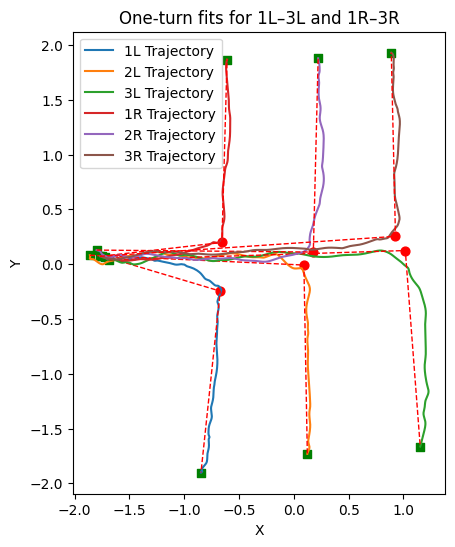

In [6]:
def plot_one_turn_indexed(X, Y, out, tag="demo"):
    xt, yt = out["xt"], out["yt"]

    plt.figure(figsize=(7,5))
    plt.plot(X, Y, 'k-', lw=2, label="Trajectory")
    plt.plot([X[0], xt, X[-1]], [Y[0], yt, Y[-1]],
             'r--', lw=2, label="One-turn model")
    plt.scatter([xt], [yt], c='red', s=80, marker='o', label="Fitted turn")
    plt.scatter([X[0], X[-1]], [Y[0], Y[-1]],
                c='green', s=60, marker='s', label="Start/End")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"{tag} — one-turn indexed fit")
    plt.xlabel("X"); plt.ylabel("Y"); plt.legend()
    plt.show()

# --- usage ---
tags = ["1L","2L","3L","1R","2R","3R"]

plt.figure(figsize=(8,6))

for t in tags:
    x, y = load_centerline(os.path.join(BASE, t), t)
    if x is None or y is None:
        print(f"[skip] {t}: no data")
        continue

    outB = fit_one_turn_indexed(x, y, end_margin=2, search_window=300, refine=True)

    xt, yt = outB["xt"], outB["yt"]

    # plot trajectory
    plt.plot(x, y, lw=1.5, label=f"{t} Trajectory")

    # plot fitted one-turn model
    plt.plot([x[0], xt, x[-1]], [y[0], yt, y[-1]], 'r--', lw=1)

    # mark turn and endpoints
    plt.scatter([xt], [yt], c='red', s=40, marker='o')
    plt.scatter([x[0], x[-1]], [y[0], y[-1]], c='green', s=30, marker='s')

plt.gca().set_aspect('equal', adjustable='box')
plt.title("One-turn fits for 1L–3L and 1R–3R")
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()



In [10]:

def plot_two_turn_indexed(X, Y, out, tag="demo", show_angles=False, arrow_len=0.15):
    """
    Plot a trajectory and its best two-turn (three-segment) fit.

    Parameters
    ----------
    X, Y : array-like
        Sampled trajectory points.
    out : dict
        Output from fit_two_turn_indexed(...). Expects keys:
        - 'xt1','yt1','xt2','yt2'
        - optional: 'turn_indices' -> (i, j)
        - optional: 'angle1','angle2','angle3'
        - optional: 'message'
    tag : str
        Title tag.
    show_angles : bool
        If True and angles are present, draw short direction arrows for each segment.
    arrow_len : float
        Length scale for the direction arrows (in data units).
    """
    x0, y0 = X[0],  Y[0]
    x3, y3 = X[-1], Y[-1]

    xt1, yt1 = out["xt1"], out["yt1"]
    xt2, yt2 = out["xt2"], out["yt2"]

    # Build the piecewise polyline (start -> turn1 -> turn2 -> end)
    px = [x0,  xt1, xt2, x3]
    py = [y0,  yt1, yt2, y3]

    # Title bits
    msg = out.get("message", "two-turn indexed fit")
    idx_str = ""
    if "turn_indices" in out:
        i, j = out["turn_indices"]
        idx_str = f" (i={i}, j={j})"

    plt.figure(figsize=(7, 5))
    # Original trajectory
    plt.plot(X, Y, 'k-', lw=2, label="Trajectory")

    # Two-turn model
    plt.plot(px, py, 'r--', lw=2, label="Two-turn model")

    # Markers
    plt.scatter([x0, x3], [y0, y3], c='green', s=60, marker='s', label="Start/End")
    plt.scatter([xt1, xt2], [yt1, yt2], c='red', s=80, marker='o', label="Fitted turns")

    # Optional direction arrows if angles provided
    if show_angles and all(k in out for k in ("angle1", "angle2", "angle3")):
        a1, a2, a3 = out["angle1"], out["angle2"], out["angle3"]
        # Unit vectors (cos, sin)
        u1, v1 = np.cos(a1), np.sin(a1)
        u2, v2 = np.cos(a2), np.sin(a2)
        u3, v3 = np.cos(a3), np.sin(a3)
        # Draw small arrows from each segment's start point
        plt.quiver([x0, xt1, xt2], [y0, yt1, yt2],
                   [u1*arrow_len, u2*arrow_len, u3*arrow_len],
                   [v1*arrow_len, v2*arrow_len, v3*arrow_len],
                   angles='xy', scale_units='xy', scale=1, width=0.003, alpha=0.8,
                   label="Segment directions")

    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"{tag} — {msg}{idx_str}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.tight_layout()
    plt.show()


KeyboardInterrupt: 

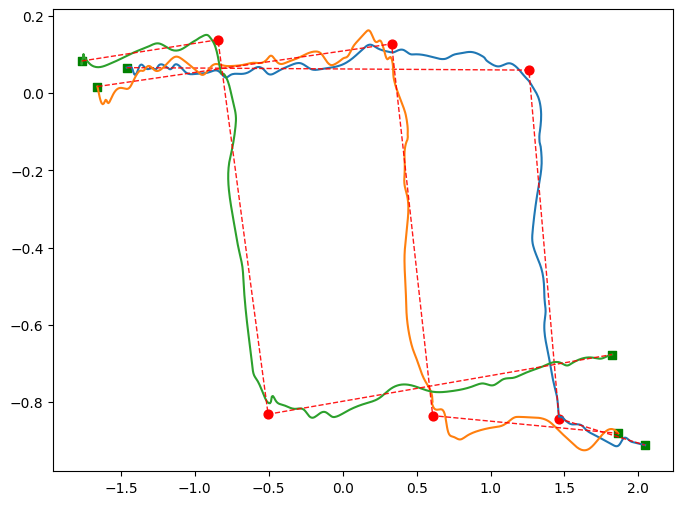

In [8]:
tags2 = ["SL1F2","SL1M2","SL1S2","SR1F2","SR1M2","SR1S2"]

plt.figure(figsize=(8,6))

for t in tags2:
    x, y = load_centerline(os.path.join(BASE, t), t)
    if x is None or y is None or len(x) < 5:
        print(f"[skip] {t}: no/short data")
        continue

    try:
        out = fit_two_turn_indexed(x, y, end_margin=2, search_window=300, refine=True)
    except Exception as e:
        print(f"[skip] {t}: fit failed ({e})")
        continue

    # unpack two turns
    xt1, yt1 = out["xt1"], out["yt1"]
    xt2, yt2 = out["xt2"], out["yt2"]

    # plot trajectory
    plt.plot(x, y, lw=1.5, label=f"{t} Trajectory")

    # plot fitted two-turn (three-segment) model
    px = [x[0],  xt1,  xt2,  x[-1]]
    py = [y[0],  yt1,  yt2,  y[-1]]
    plt.plot(px, py, 'r--', lw=1, alpha=0.9, label=f"{t} Two-turn fit")

    # mark turns + endpoints
    plt.scatter([xt1, xt2], [yt1, yt2], c='red', s=40, marker='o')
    plt.scatter([x[0], x[-1]], [y[0], y[-1]], c='green', s=30, marker='s')

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("X"); plt.ylabel("Y")
plt.title("Two-turn indexed fits (all tags)")
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()


In [11]:
tags2 = ["SL1F2","SL1M2","SL1S2","SR1F2","SR1M2","SR1S2"]

plt.figure(figsize=(8,6))

handles = []
labels  = []

for t in tags2:
    x, y = load_centerline(os.path.join(BASE, t), t)
    if x is None or y is None or len(x) < 5:
        print(f"[skip] {t}: no/short data")
        continue

    try:
        out = fit_two_turn_indexed_compat(x, y, end_margin=2, search_window=300, refine=True)
    except Exception as e:
        print(f"[skip] {t}: fit failed ({e})")
        continue

    # unpack two turns
    xt1, yt1 = out["xt1"], out["yt1"]
    xt2, yt2 = out["xt2"], out["yt2"]

    # plot trajectory
    h1, = plt.plot(x, y, lw=1.5, label=f"{t} Trajectory")

    # plot fitted two-turn (three-segment) model
    px = [x[0],  xt1,  xt2,  x[-1]]
    py = [y[0],  yt1,  yt2,  y[-1]]
    h2, = plt.plot(px, py, 'r--', lw=1, alpha=0.9, label=f"{t} Two-turn fit")

    # mark turns + endpoints
    plt.scatter([xt1, xt2], [yt1, yt2], c='red', s=40, marker='o')
    plt.scatter([x[0], x[-1]], [y[0], y[-1]], c='green', s=30, marker='s')

    # collect unique legend entries (avoid dupes)
    handles.extend([h1, h2])
    labels.extend([h1.get_label(), h2.get_label()])

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("X"); plt.ylabel("Y")
plt.title("Two-turn indexed fits (all tags)")

# de-duplicate legend labels while preserving order
seen = set()
uniq = [(h,l) for h,l in zip(handles, labels) if (l not in seen and not seen.add(l))]
plt.legend([h for h,_ in uniq], [l for _,l in uniq], ncol=2, fontsize=9)

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

<Figure size 800x600 with 0 Axes>

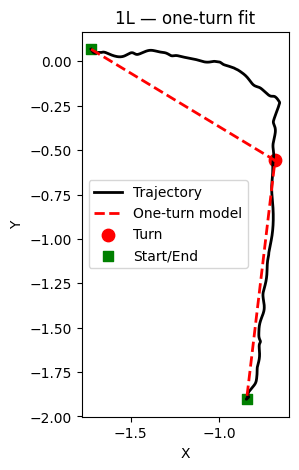

In [ ]:
def plot_one_turn(x, y, res_one, tag="demo"):
    xt_fit, yt_fit = res_one["xt"], res_one["yt"]

    plt.figure(figsize=(7,5))
    plt.plot(x, y, 'k-', lw=2, label="Trajectory")
    plt.plot([x[0], xt_fit, x[-1]], [y[0], yt_fit, y[-1]], 
             'r--', lw=2, label="One-turn model")
    plt.scatter([xt_fit], [yt_fit], c='red', s=80, marker='o', label="Turn")
    plt.scatter([x[0], x[-1]], [y[0], y[-1]], 
                c='green', s=60, marker='s', label="Start/End")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"{tag} — one-turn fit")
    plt.xlabel("X"); plt.ylabel("Y"); plt.legend()
    plt.show()

# --- usage for tag "1L" ---
tag = "1L"
folder = os.path.join(BASE, tag)
x, y = load_centerline(folder, tag)
res_one = run_one_turn_for_tag(BASE, tag)

plot_one_turn(x, y, res_one, tag)
